# Explore here

In [34]:
import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

import statistics as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [19]:
# Cargamos el Dataset y lo guardamos en raw para poderlo leer:

from ssl import _create_unverified_context
import ssl

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())
df= pd.read_csv(ssl_context, index_col=None, delimiter=",")

df.to_csv("/Users/nataliagarciavila/Desktop/4 GEEKS ACADEMY/CLASES_EJERCICIOS_/CLASES_EJERCICIOS_/EJERCICIOS/CLASE 26- EJERCICIOS/machine-learning-python-template/data/raw/data.csv")

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [20]:
df.shape

(366, 2)

1. PREDICCIÓN DE LA SERIE TEMPORAL

In [21]:
#Transformamos la cadena de echa a objeto

total_data = df

total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
ts_total = total_data["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

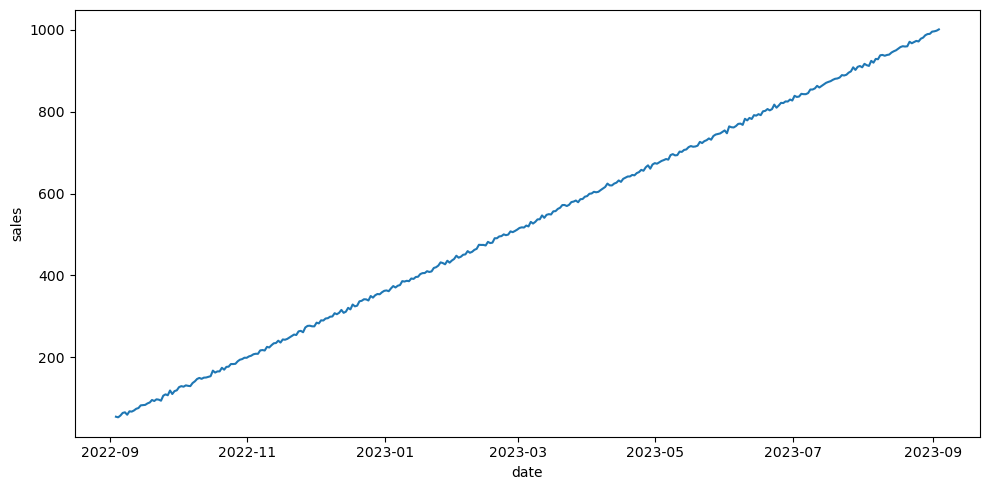

In [22]:
#Trazamos la serie temporal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)

plt.tight_layout()

plt.show()

2. CONSTRUIMOS Y ANALIZAMOS LA SERIE TEMPORAL

In [38]:


def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Descomposición de la serie

In [24]:

decomposition = seasonal_decompose(ts_total)
decomposition

Análisis de las tendencias

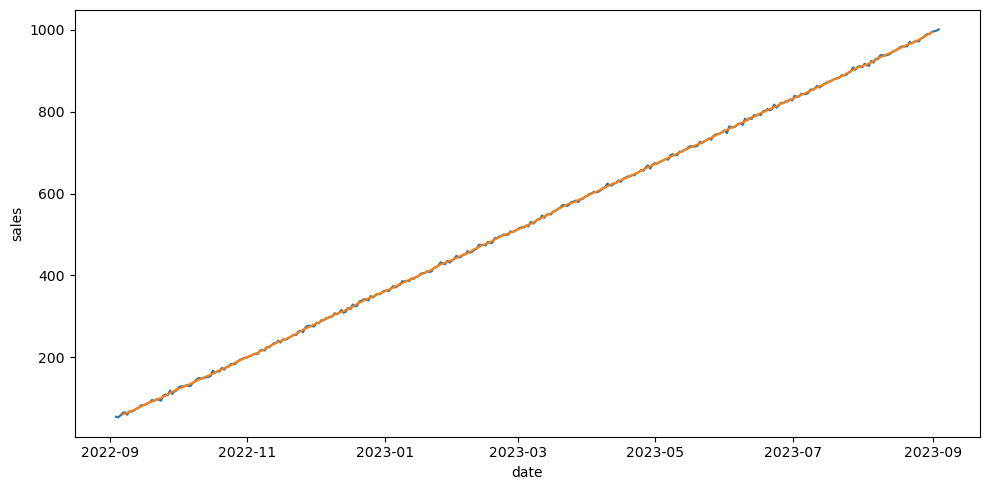

In [25]:

trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Análisis de la estacionalidad

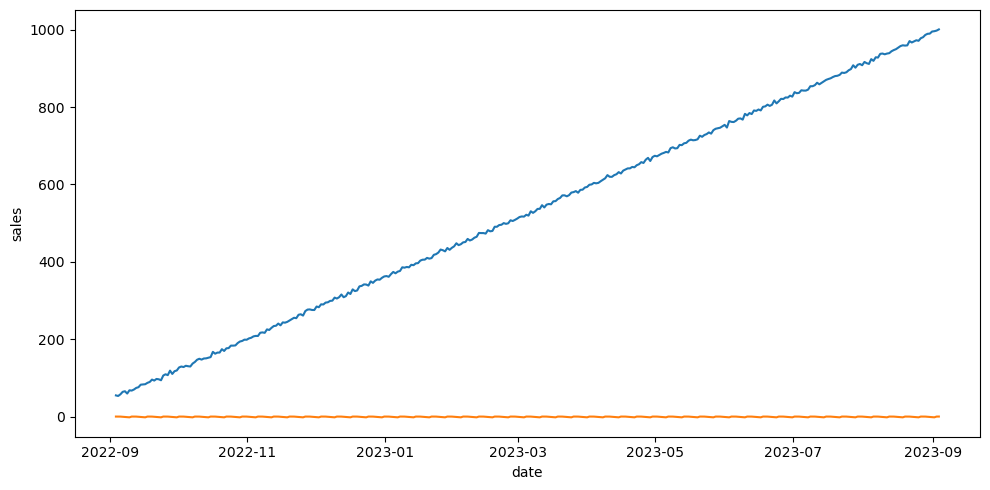

In [26]:


seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [27]:

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Análisis de variabilidad

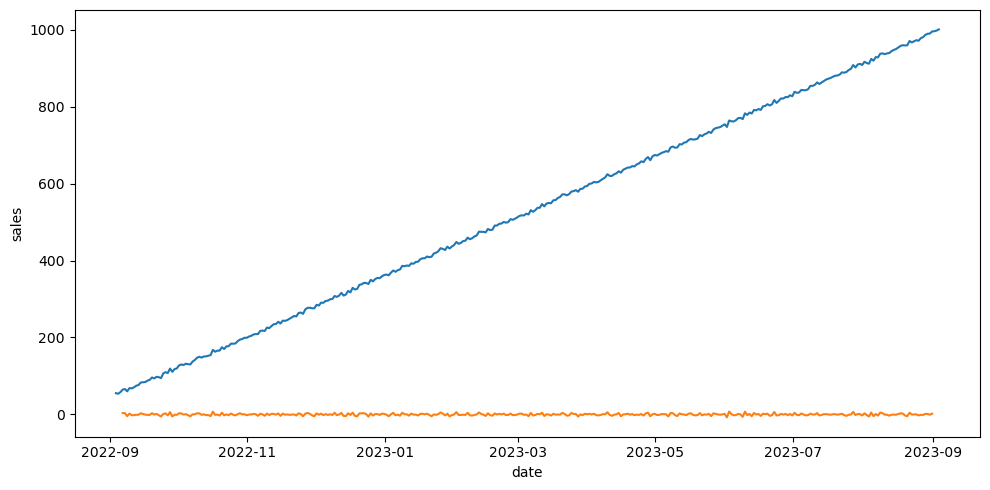

In [28]:

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Análisis de autocorrelación

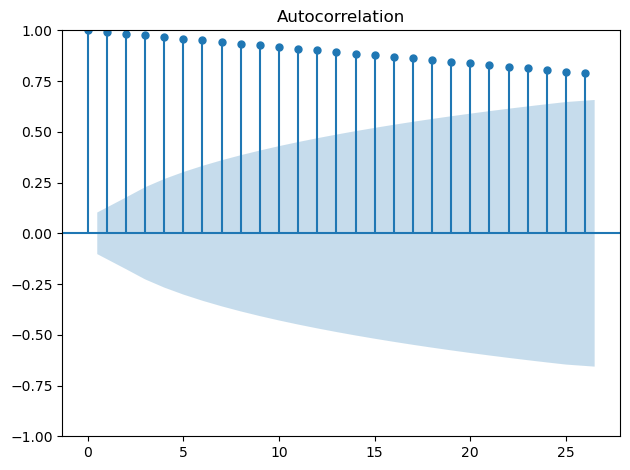

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_total)

plt.tight_layout()

plt.show()

Avanzando en la serie temporal, la autocorrelación se pierde regularmente y eso hace que se dificulte la capacidad predictiva del modelo.

PASO 3: ENTRENAR UN ARIMA

In [36]:
from pmdarima import auto_arima

model = auto_arima(ts_total, seasonal = False, trace = True, m = 7)

/Users/nataliagarciavila/miniconda3/envs/myenv/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.776 seconds


El mejor modelo ARIMA fue ARIMA (1,1,1)

PASO 4: PREDECIR CON EL CONJUNTO DE PRUEBA

In [37]:
forecast = model.predict(60)
forecast

2023-09-04 17:10:08.079328    1002.158118
2023-09-05 17:10:08.079328    1004.831639
2023-09-06 17:10:08.079328    1007.423258
2023-09-07 17:10:08.079328    1010.021597
2023-09-08 17:10:08.079328    1012.619384
2023-09-09 17:10:08.079328    1015.217217
2023-09-10 17:10:08.079328    1017.815046
2023-09-11 17:10:08.079328    1020.412876
2023-09-12 17:10:08.079328    1023.010705
2023-09-13 17:10:08.079328    1025.608534
2023-09-14 17:10:08.079328    1028.206364
2023-09-15 17:10:08.079328    1030.804193
2023-09-16 17:10:08.079328    1033.402023
2023-09-17 17:10:08.079328    1035.999852
2023-09-18 17:10:08.079328    1038.597681
2023-09-19 17:10:08.079328    1041.195511
2023-09-20 17:10:08.079328    1043.793340
2023-09-21 17:10:08.079328    1046.391170
2023-09-22 17:10:08.079328    1048.988999
2023-09-23 17:10:08.079328    1051.586828
2023-09-24 17:10:08.079328    1054.184658
2023-09-25 17:10:08.079328    1056.782487
2023-09-26 17:10:08.079328    1059.380317
2023-09-27 17:10:08.079328    1061

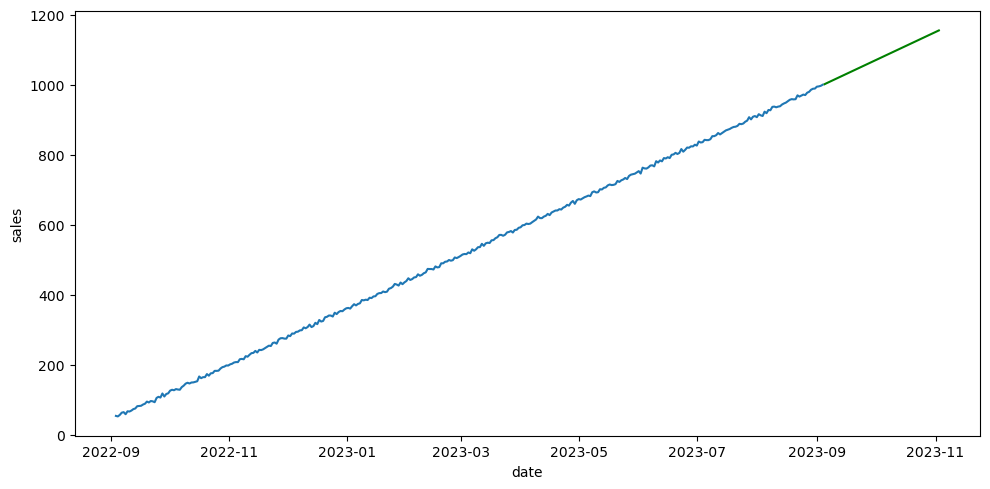

In [39]:

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()